# Importing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#  get a list of yml files
dir_path = os.path.join("/content/drive/My Drive/", "UBS_Challenge")
df_dir_path = os.path.join("/content/drive/My Drive/", "UBS_Challenge", "df_save")

In [4]:
# Load the DataFrame from the pickle file
loaded_df = pd.read_pickle(os.path.join(df_dir_path, "dummyTrade1_Expiry_10y_Tenor_10y.pkl"))

# Display the loaded DataFrame
loaded_df

index        Date Expiry Tenor  Swap Rate  atm-1.0%  atm-0.5%       atm  \
0        0  2021-01-13    10y   10y   1.656352  0.170552  0.135412  0.114587   
1        1  2021-01-15    10y   10y   1.692187  0.170830  0.135229  0.114202   
2        2  2021-01-18    10y   10y   1.692110  0.170676  0.134889  0.113746   
3        3  2021-01-19    10y   10y   1.665977  0.169022  0.134019  0.113075   
4        4  2021-01-20    10y   10y   1.671445  0.166314  0.133491  0.113292   
..     ...         ...    ...   ...        ...       ...       ...       ...   
749    749  2024-01-08    10y   10y   3.369039  0.251254  0.234928  0.230950   
750    750  2024-01-09    10y   10y   3.373386  0.250361  0.234243  0.230286   
751    751  2024-01-10    10y   10y   3.387857  0.250802  0.234582  0.230554   
752    752  2024-01-11    10y   10y   3.387992  0.251988  0.235776  0.231772   
753    753  2024-01-12    10y   10y   3.403015  0.254290  0.237791  0.233729   

     atm+0.5%  atm+1.0%  ...  Vega shock -25  Vega shock -10  Vega shock -5  \
0    0.137742  0.169685  ...             NaN             NaN            NaN   
1    0.137510  0.169476  ...             NaN             NaN            NaN   
2    0.137138  0.169098  ...             NaN             NaN            NaN   
3    0.136292  0.168167  ...             NaN             NaN            NaN   
4    0.135921  0.167649  ...             NaN             NaN            NaN   
..        ...       ...  ...             ...             ...            ...   
749  0.250790  0.284398  ...       -0.224677       -0.228094      -0.186551   
750  0.250055  0.283565  ...       -0.187034       -0.208269      -0.128312   
751  0.250372  0.283917  ...       -0.138462       -0.131091      -0.108933   
752  0.251664  0.285214  ...       -0.026067       -0.098858      -0.055819   
753  0.253795  0.287480  ...       -0.073403       -0.126800      -0.157149   

     Vega shock 0  Vega shock 5  Vega shock 10  Vega shock 25  Vega shock 50  \
0             NaN           NaN            NaN            NaN            NaN   
1             NaN           NaN            NaN            NaN            NaN   
2             NaN           NaN            NaN            NaN            NaN   
3             NaN           NaN            NaN            NaN            NaN   
4             NaN           NaN            NaN            NaN            NaN   
..            ...           ...            ...            ...            ...   
749     -0.174759     -0.192765      -0.170602      -0.173002      -0.196748   
750     -0.121352     -0.162782      -0.171511      -0.057429      -0.024773   
751     -0.064916     -0.105740      -0.124410      -0.018045      -0.016208   
752     -0.084956     -0.059589       0.054527      -0.006037      -0.005555   
753     -0.137206     -0.108718      -0.143683       0.006733      -0.030110   

     Vega shock 75  Vega shock 100  
0              NaN             NaN  
1              NaN             NaN  
2              NaN             NaN  
3              NaN             NaN  
4              NaN             NaN  
..             ...             ...  
749      -0.007596        0.020256  
750       0.106415        0.084073  
751       0.026433        0.057059  
752      -0.025949       -0.034356  
753      -0.149893        0.010670  

[754 rows x 34 columns]

# Data observation

## Observe Vega

Note that when tenor is 18M, vega is always 0

In [5]:
# Dictionary
Expiry_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
Tenor_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
dummyTrade_dict = {0: 'dummyTrade1', 1: 'dummyTrade2', 2: 'dummyTrade3', 3: 'dummyTrade4', 4: 'dummyTrade5', 5: 'dummyTrade6', 6: 'dummyTrade7', 7: 'dummyTrade8', 8: 'dummyTrade9', 9: 'dummyTrade10', 10: 'dummyTrade11', 11: 'dummyTrade12', }

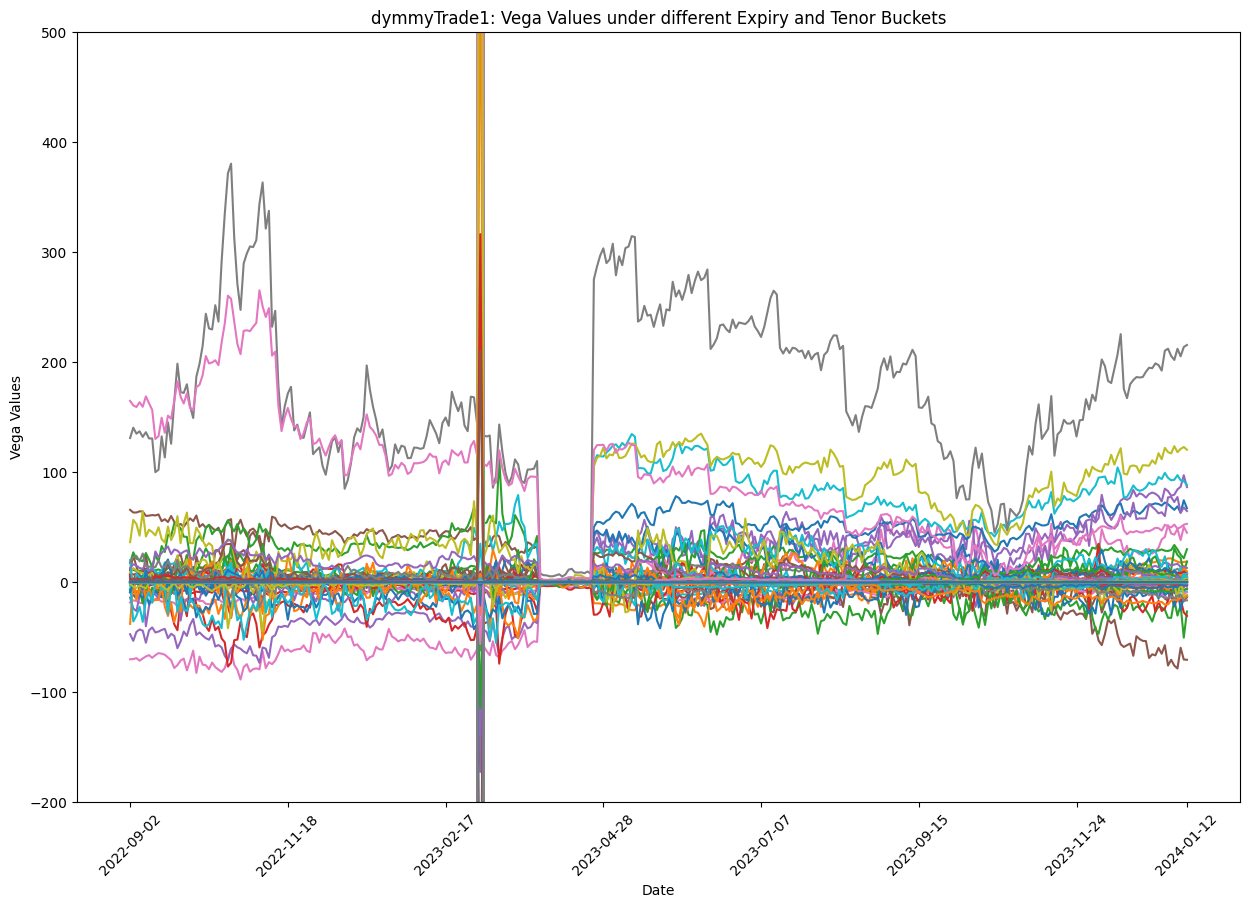

In [6]:
vega_data = {}

for Expiry_index in range(9):

  for Tenor_index in range(9):

    # filename
    file_name = "dummyTrade1_Expiry_" + Expiry_dict[Expiry_index] + "_Tenor_" + Tenor_dict[Tenor_index] + ".pkl"

    # Load the DataFrame from the pickle file
    loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

    # Extract, clean, and convert columns to NumPy arrays along with the Date
    cleaned_data = loaded_df[['Date', 'Vega shock 0']].dropna()
    vega_data["Expiry = " + Expiry_dict[Expiry_index] + "; Tenor = " + Tenor_dict[Tenor_index]] = (cleaned_data['Date'].to_numpy(), cleaned_data['Vega shock 0'].to_numpy())

# Plotting the arrays
plt.figure(figsize=(15, 10))
for name, (dates, values) in vega_data.items():
    plt.plot(dates, values, label=name)

# Set y-axis limits
plt.ylim(-200, 500)  # Example limits

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Vega Values')
plt.title('dymmyTrade1: Vega Values under different Expiry and Tenor Buckets')
# plt.legend()

# Customize x-ticks to show date for every 50 entries
all_dates = vega_data["Expiry = 1y; Tenor = 1y"][0]  # Using one column's dates as reference since all dates should be aligned
xticks = np.arange(0, len(all_dates), 50)
if xticks[-1] != len(all_dates) - 1:
    xticks = np.append(xticks, len(all_dates) - 1)
xtick_labels = all_dates[xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Show
plt.show()

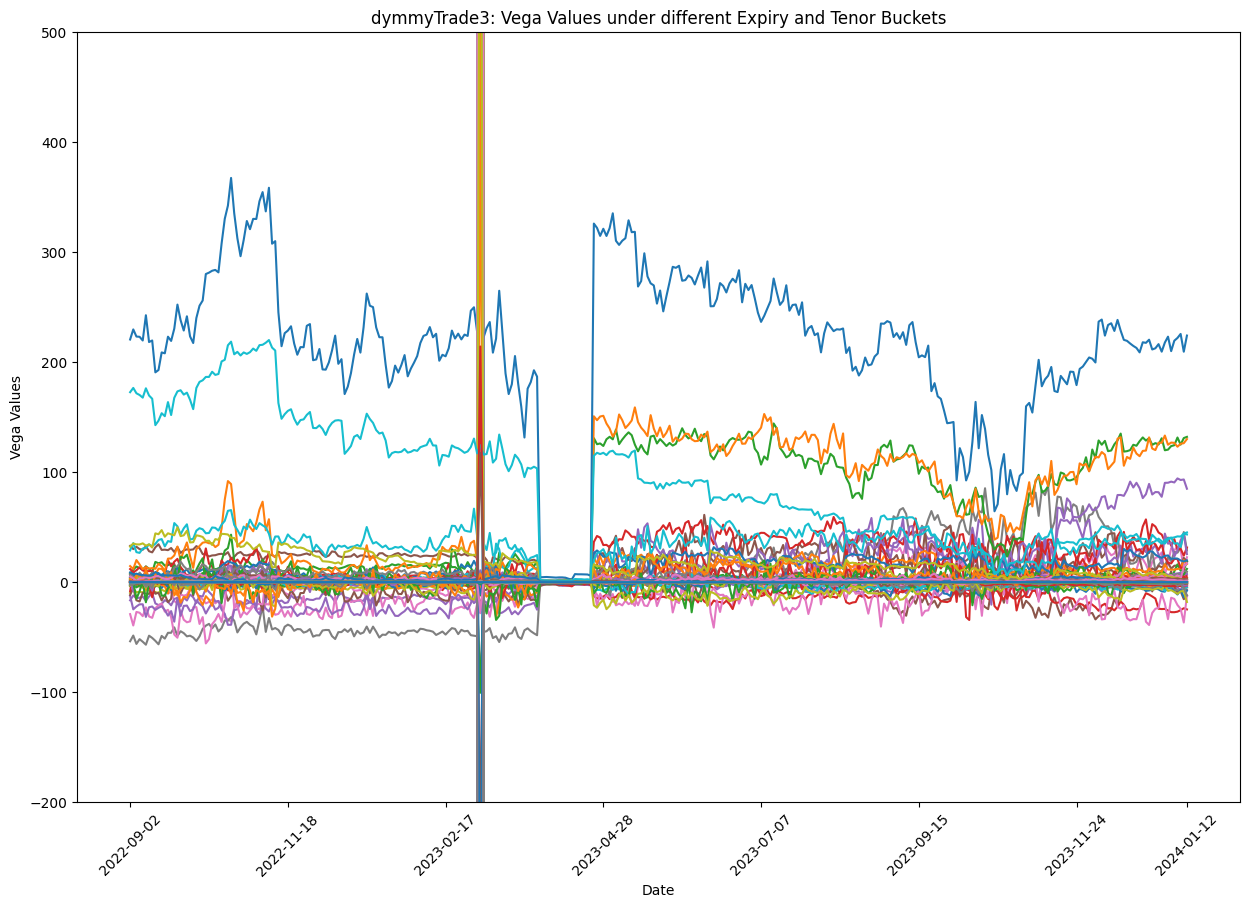

In [7]:
vega_data = {}

for Expiry_index in range(9):

  for Tenor_index in range(9):

    # filename
    file_name = "dummyTrade3_Expiry_" + Expiry_dict[Expiry_index] + "_Tenor_" + Tenor_dict[Tenor_index] + ".pkl"

    # Load the DataFrame from the pickle file
    loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

    # Extract, clean, and convert columns to NumPy arrays along with the Date
    cleaned_data = loaded_df[['Date', 'Vega shock 0']].dropna()
    vega_data["Expiry = " + Expiry_dict[Expiry_index] + "; Tenor = " + Tenor_dict[Tenor_index]] = (cleaned_data['Date'].to_numpy(), cleaned_data['Vega shock 0'].to_numpy())

# Plotting the arrays
plt.figure(figsize=(15, 10))
for name, (dates, values) in vega_data.items():
    plt.plot(dates, values, label=name)

# Set y-axis limits
plt.ylim(-200, 500)  # Example limits

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Vega Values')
plt.title('dymmyTrade3: Vega Values under different Expiry and Tenor Buckets')
# plt.legend()

# Customize x-ticks to show date for every 50 entries
all_dates = vega_data["Expiry = 1y; Tenor = 1y"][0]  # Using one column's dates as reference since all dates should be aligned
xticks = np.arange(0, len(all_dates), 50)
if xticks[-1] != len(all_dates) - 1:
    xticks = np.append(xticks, len(all_dates) - 1)
xtick_labels = all_dates[xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Show
plt.show()

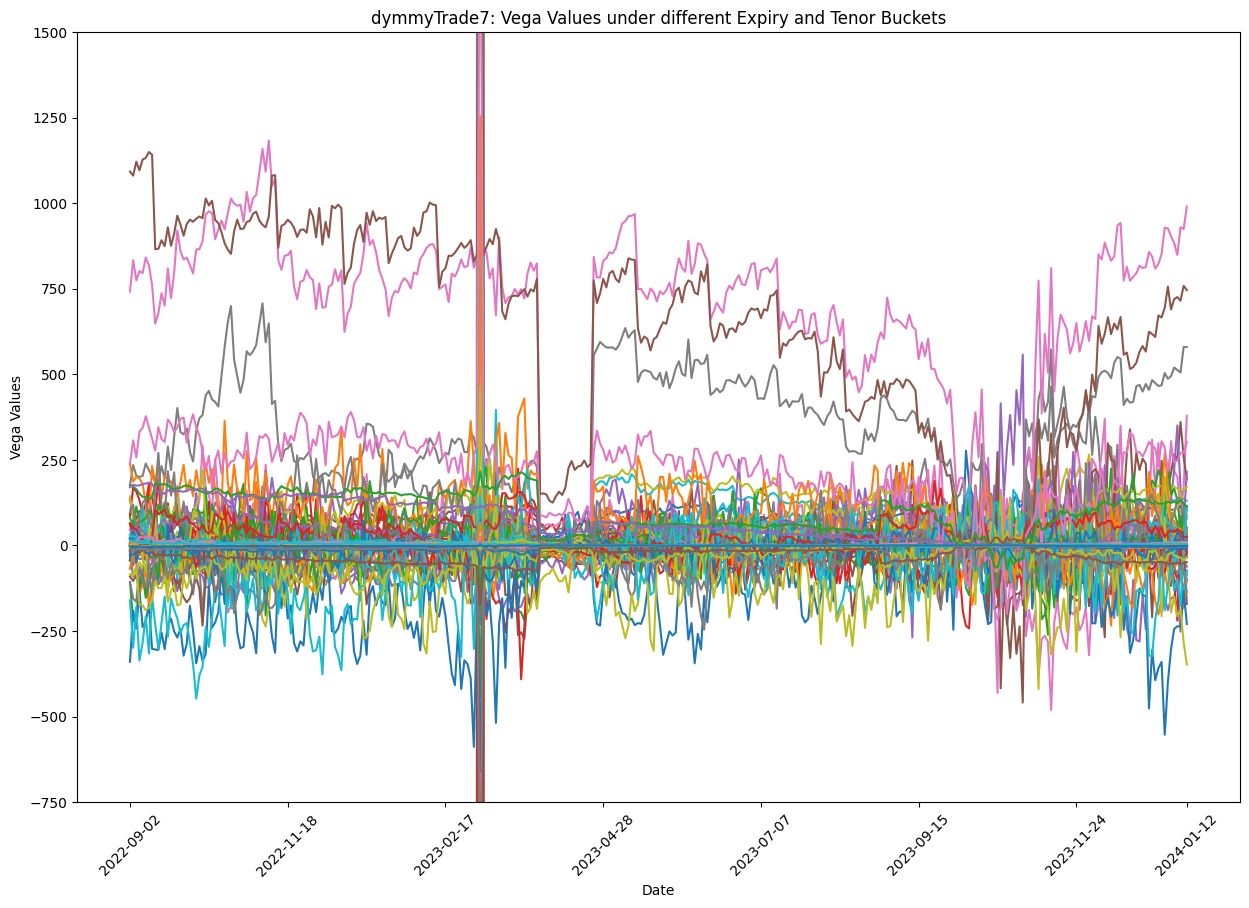

In [8]:
vega_data = {}

for Expiry_index in range(9):

  for Tenor_index in range(9):

    # filename
    file_name = "dummyTrade7_Expiry_" + Expiry_dict[Expiry_index] + "_Tenor_" + Tenor_dict[Tenor_index] + ".pkl"

    # Load the DataFrame from the pickle file
    loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

    # Extract, clean, and convert columns to NumPy arrays along with the Date
    cleaned_data = loaded_df[['Date', 'Vega shock 0']].dropna()
    vega_data["Expiry = " + Expiry_dict[Expiry_index] + "; Tenor = " + Tenor_dict[Tenor_index]] = (cleaned_data['Date'].to_numpy(), cleaned_data['Vega shock 0'].to_numpy())

# Plotting the arrays
plt.figure(figsize=(15, 10))
for name, (dates, values) in vega_data.items():
    plt.plot(dates, values, label=name)

# Set y-axis limits
plt.ylim(-750, 1500)  # Example limits

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Vega Values')
plt.title('dymmyTrade7: Vega Values under different Expiry and Tenor Buckets')
# plt.legend()

# Customize x-ticks to show date for every 50 entries
all_dates = vega_data["Expiry = 1y; Tenor = 1y"][0]  # Using one column's dates as reference since all dates should be aligned
xticks = np.arange(0, len(all_dates), 50)
if xticks[-1] != len(all_dates) - 1:
    xticks = np.append(xticks, len(all_dates) - 1)
xtick_labels = all_dates[xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Show
plt.show()

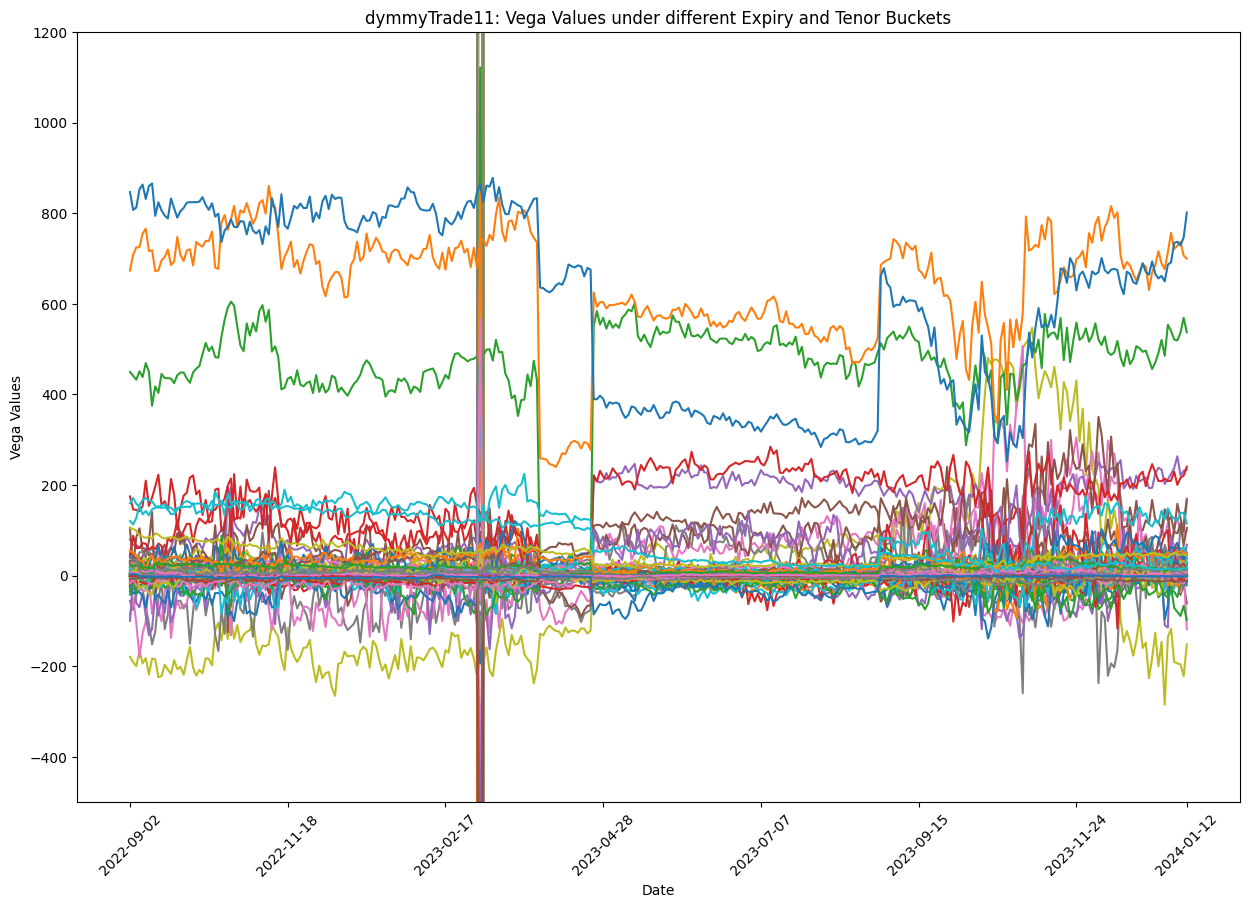

In [9]:
vega_data = {}

for Expiry_index in range(9):

  for Tenor_index in range(9):

    # filename
    file_name = "dummyTrade11_Expiry_" + Expiry_dict[Expiry_index] + "_Tenor_" + Tenor_dict[Tenor_index] + ".pkl"

    # Load the DataFrame from the pickle file
    loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

    # Extract, clean, and convert columns to NumPy arrays along with the Date
    cleaned_data = loaded_df[['Date', 'Vega shock 0']].dropna()
    vega_data["Expiry = " + Expiry_dict[Expiry_index] + "; Tenor = " + Tenor_dict[Tenor_index]] = (cleaned_data['Date'].to_numpy(), cleaned_data['Vega shock 0'].to_numpy())

# Plotting the arrays
plt.figure(figsize=(15, 10))
for name, (dates, values) in vega_data.items():
    plt.plot(dates, values, label=name)

# Set y-axis limits
plt.ylim(-500, 1200)  # Example limits

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Vega Values')
plt.title('dymmyTrade11: Vega Values under different Expiry and Tenor Buckets')
# plt.legend()

# Customize x-ticks to show date for every 50 entries
all_dates = vega_data["Expiry = 1y; Tenor = 1y"][0]  # Using one column's dates as reference since all dates should be aligned
xticks = np.arange(0, len(all_dates), 50)
if xticks[-1] != len(all_dates) - 1:
    xticks = np.append(xticks, len(all_dates) - 1)
xtick_labels = all_dates[xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Show
plt.show()

## Observe market swap rates

In [ ]:
# Dictionary
Expiry_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
Tenor_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
dummyTrade_dict = {0: 'dummyTrade1', 1: 'dummyTrade2', 2: 'dummyTrade3', 3: 'dummyTrade4', 4: 'dummyTrade5', 5: 'dummyTrade6', 6: 'dummyTrade7', 7: 'dummyTrade8', 8: 'dummyTrade9', 9: 'dummyTrade10', 10: 'dummyTrade11', 11: 'dummyTrade12', }

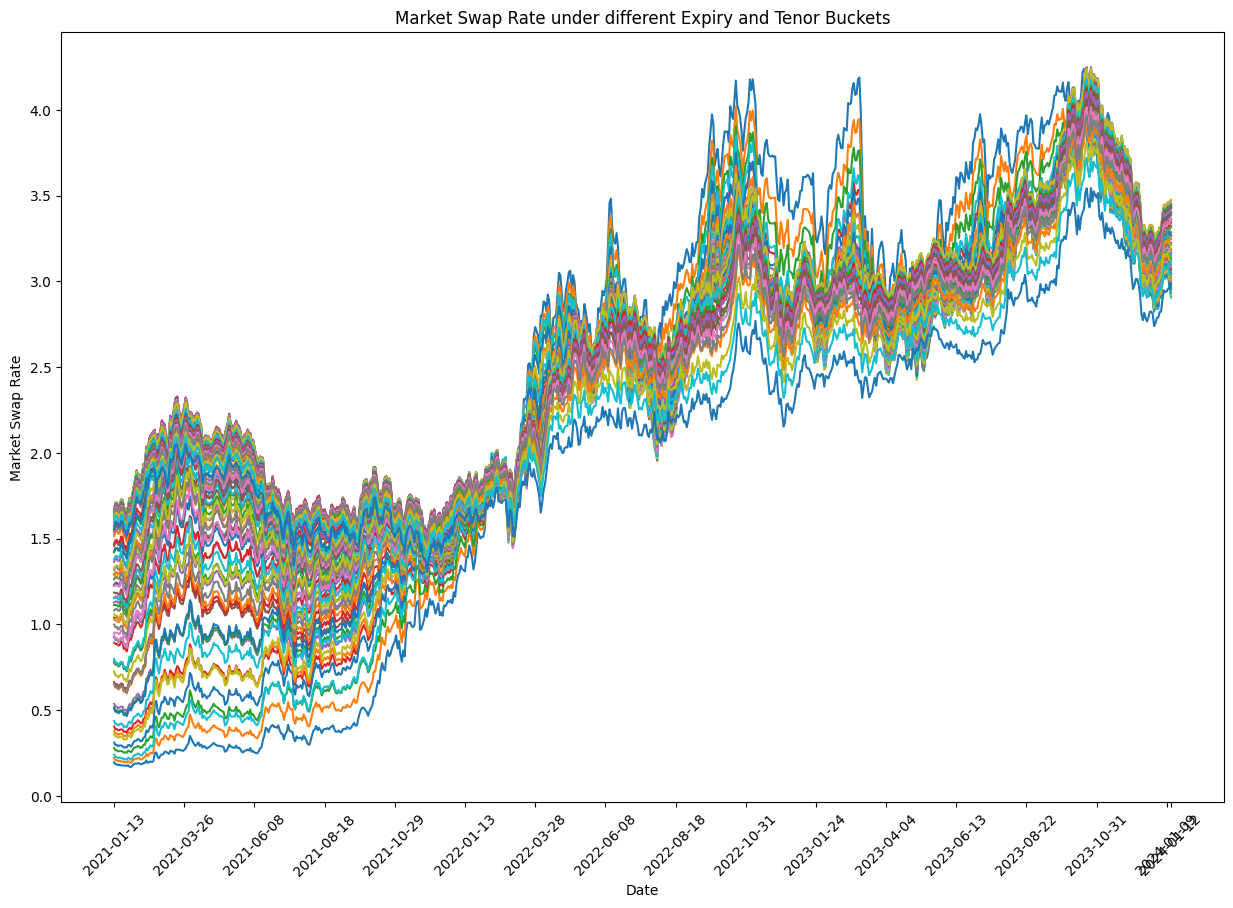

In [ ]:
vega_data = {}

for Expiry_index in range(9):

  for Tenor_index in range(9):

    # filename
    file_name = "dummyTrade1_Expiry_" + Expiry_dict[Expiry_index] + "_Tenor_" + Tenor_dict[Tenor_index] + ".pkl"

    # Load the DataFrame from the pickle file
    loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

    # Extract, clean, and convert columns to NumPy arrays along with the Date
    cleaned_data = loaded_df[['Date', 'Swap Rate']].dropna()
    vega_data["Expiry = " + Expiry_dict[Expiry_index] + "; Tenor = " + Tenor_dict[Tenor_index]] = (cleaned_data['Date'].to_numpy(), cleaned_data['Swap Rate'].to_numpy())

# Plotting the arrays
plt.figure(figsize=(15, 10))
for name, (dates, values) in vega_data.items():
    plt.plot(dates, values, label=name)

# # Set y-axis limits
# plt.ylim(-200, 500)  # Example limits

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Market Swap Rate')
plt.title('Market Swap Rate under different Expiry and Tenor Buckets')
# plt.legend()

# Customize x-ticks to show date for every 50 entries
all_dates = vega_data["Expiry = 1y; Tenor = 1y"][0]  # Using one column's dates as reference since all dates should be aligned
xticks = np.arange(0, len(all_dates), 50)
if xticks[-1] != len(all_dates) - 1:
    xticks = np.append(xticks, len(all_dates) - 1)
xtick_labels = all_dates[xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Show
plt.show()

## Observe market Implied Normal Volatility

In [ ]:
# Dictionary
Expiry_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
Tenor_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
dummyTrade_dict = {0: 'dummyTrade1', 1: 'dummyTrade2', 2: 'dummyTrade3', 3: 'dummyTrade4', 4: 'dummyTrade5', 5: 'dummyTrade6', 6: 'dummyTrade7', 7: 'dummyTrade8', 8: 'dummyTrade9', 9: 'dummyTrade10', 10: 'dummyTrade11', 11: 'dummyTrade12', }

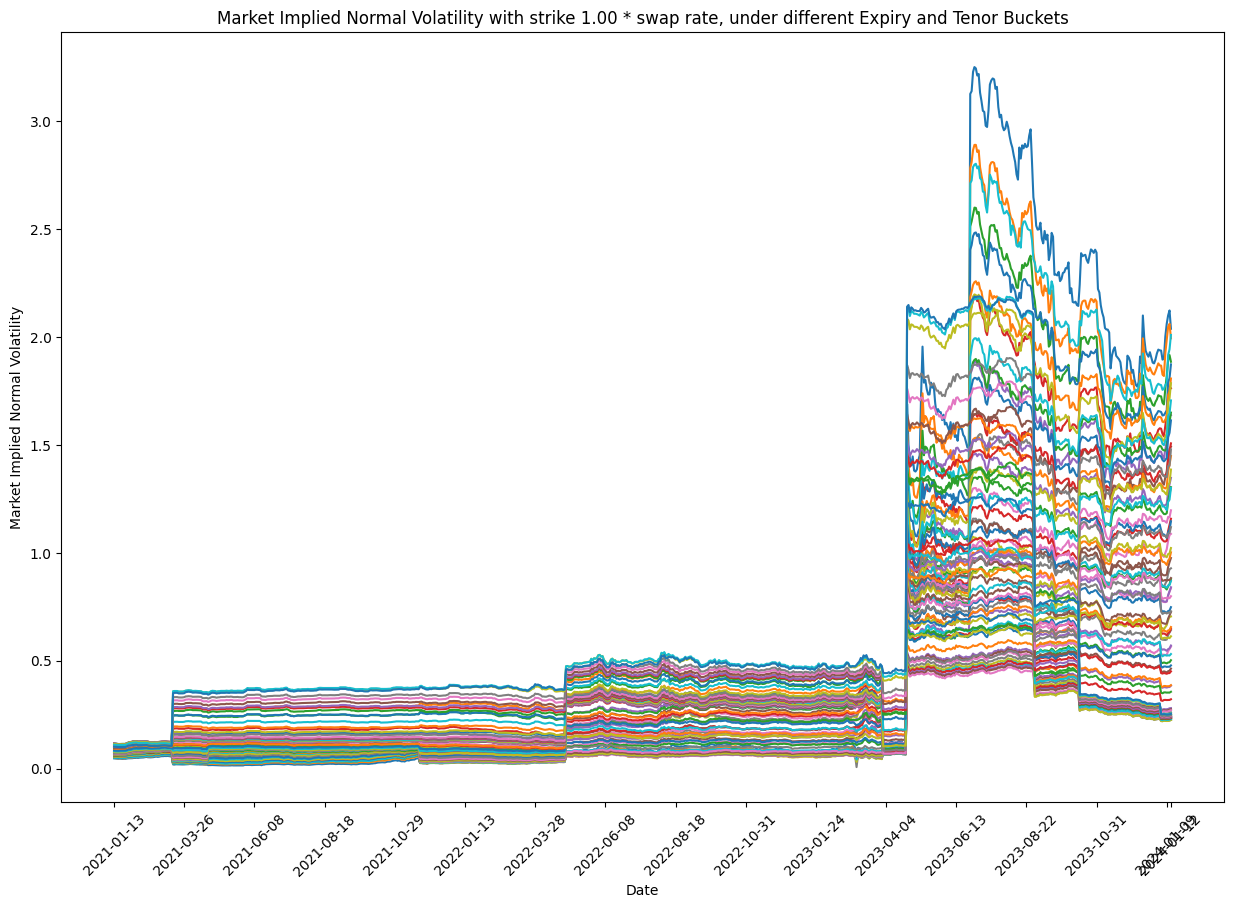

In [ ]:
vega_data = {}

for Expiry_index in range(9):

  for Tenor_index in range(9):

    # filename
    file_name = "dummyTrade1_Expiry_" + Expiry_dict[Expiry_index] + "_Tenor_" + Tenor_dict[Tenor_index] + ".pkl"

    # Load the DataFrame from the pickle file
    loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

    # Extract, clean, and convert columns to NumPy arrays along with the Date
    cleaned_data = loaded_df[['Date', 'atm']].dropna()
    vega_data["Expiry = " + Expiry_dict[Expiry_index] + "; Tenor = " + Tenor_dict[Tenor_index]] = (cleaned_data['Date'].to_numpy(), cleaned_data['atm'].to_numpy())

# Plotting the arrays
plt.figure(figsize=(15, 10))
for name, (dates, values) in vega_data.items():
    plt.plot(dates, values, label=name)

# # Set y-axis limits
# plt.ylim(-200, 500)  # Example limits

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Market Implied Normal Volatility')
plt.title('Market Implied Normal Volatility with strike 1.00 * swap rate, under different Expiry and Tenor Buckets')
# plt.legend()

# Customize x-ticks to show date for every 50 entries
all_dates = vega_data["Expiry = 1y; Tenor = 1y"][0]  # Using one column's dates as reference since all dates should be aligned
xticks = np.arange(0, len(all_dates), 50)
if xticks[-1] != len(all_dates) - 1:
    xticks = np.append(xticks, len(all_dates) - 1)
xtick_labels = all_dates[xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Show
plt.show()

# Correlation

## Observe correlation of Vega under different Zero Rate Shock values

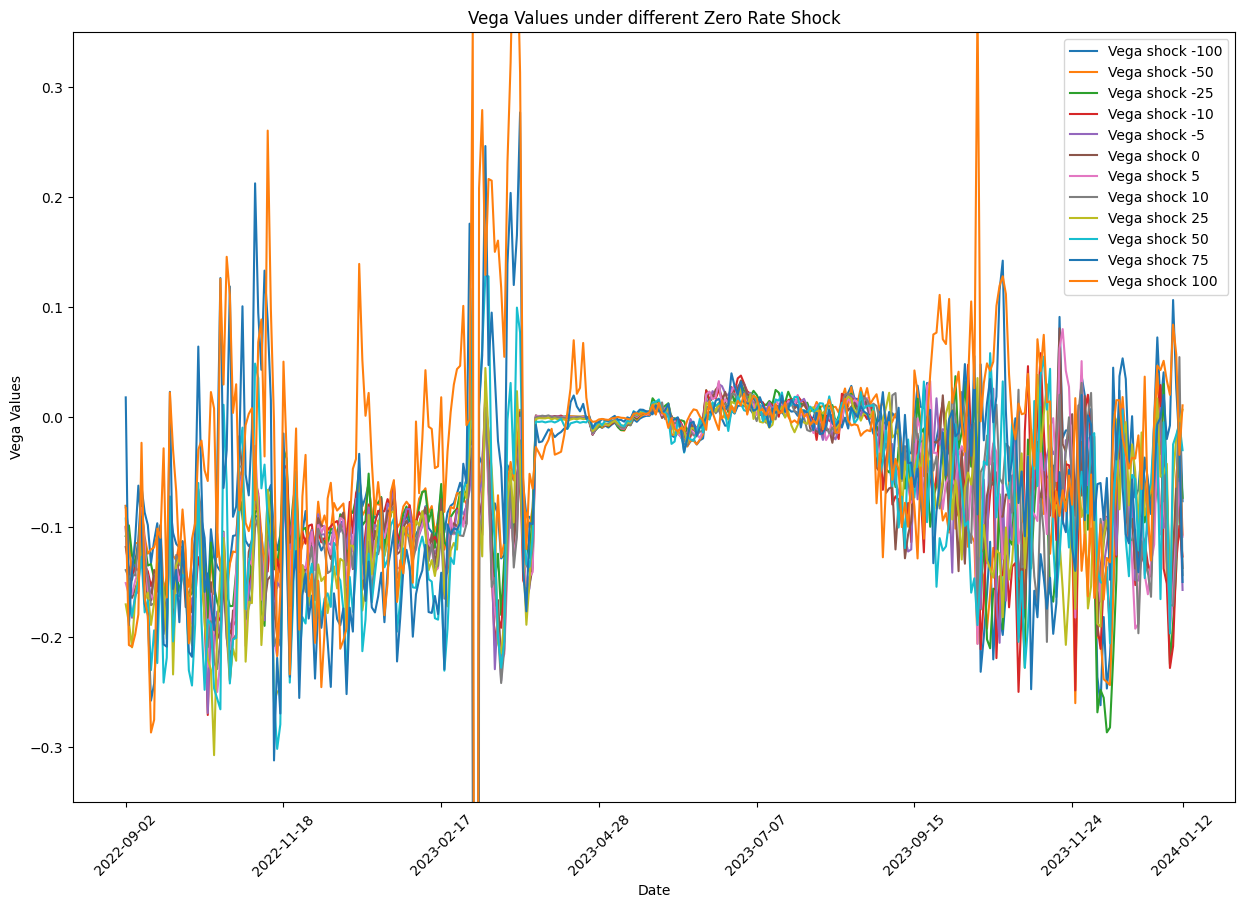

In [ ]:
# Load the DataFrame from the pickle file
loaded_df = pd.read_pickle(os.path.join(df_dir_path, "dummyTrade1_Expiry_10y_Tenor_10y.pkl"))

# Display the loaded DataFrame
loaded_df

# List of Vega shock columns
vega_columns = [
    'Vega shock -100', 'Vega shock -50', 'Vega shock -25', 'Vega shock -10',
    'Vega shock -5', 'Vega shock 0', 'Vega shock 5', 'Vega shock 10',
    'Vega shock 25', 'Vega shock 50', 'Vega shock 75', 'Vega shock 100'
]

# Extract, clean, and convert columns to NumPy arrays along with the Date
vega_data = {}
for col in vega_columns:
    cleaned_data = loaded_df[['Date', col]].dropna()
    vega_data[col] = (cleaned_data['Date'].to_numpy(), cleaned_data[col].to_numpy())

# Plotting the arrays
plt.figure(figsize=(15, 10))
for col, (dates, values) in vega_data.items():
    plt.plot(dates, values, label=col)

# Set y-axis limits
plt.ylim(-0.35, 0.35)  # Example limits

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Vega Values')
plt.title('Vega Values under different Zero Rate Shock')
plt.legend()

# Customize x-ticks to show date for every 50 entries
all_dates = vega_data['Vega shock -100'][0]  # Using one column's dates as reference since all dates should be aligned
xticks = np.arange(0, len(all_dates), 50)
if xticks[-1] != len(all_dates) - 1:
    xticks = np.append(xticks, len(all_dates) - 1)
xtick_labels = all_dates[xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Show
plt.show()

Outliers usually happen at Zero Rate Shock = 100 or Zero Rate Shock = 75

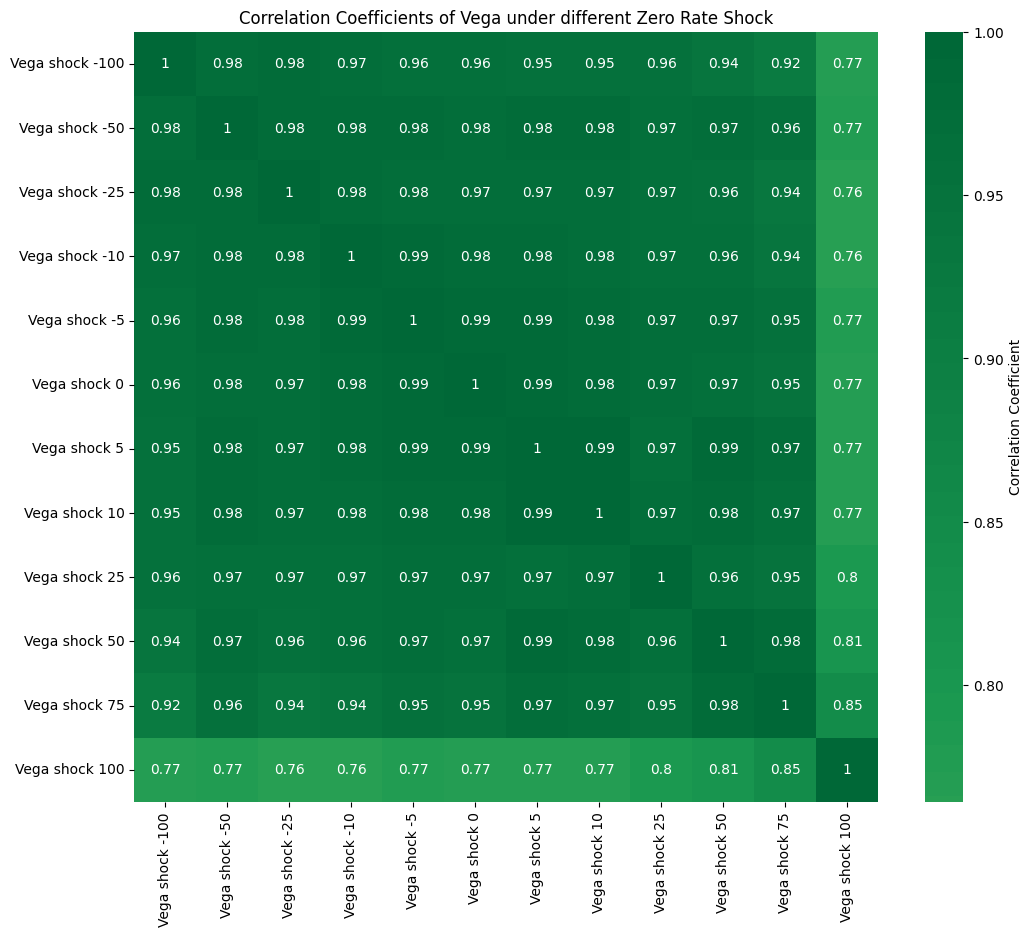

In [ ]:
# Load the DataFrame from the pickle file
loaded_df = pd.read_pickle(os.path.join(df_dir_path, "dummyTrade1_Expiry_10y_Tenor_10y.pkl"))

# Display the loaded DataFrame
loaded_df

# List of Vega shock columns
vega_columns = [
    'Vega shock -100', 'Vega shock -50', 'Vega shock -25', 'Vega shock -10',
    'Vega shock -5', 'Vega shock 0', 'Vega shock 5', 'Vega shock 10',
    'Vega shock 25', 'Vega shock 50', 'Vega shock 75', 'Vega shock 100'
]

# Extract and clean each Vega shock column, dropping NaN values
cleaned_vega_df = loaded_df[vega_columns].dropna()

# Compute the correlation matrix
corr_matrix = cleaned_vega_df.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Correlation Coefficient'})

# Set labels and title
plt.title('Correlation Coefficients of Vega under different Zero Rate Shock')
plt.show()

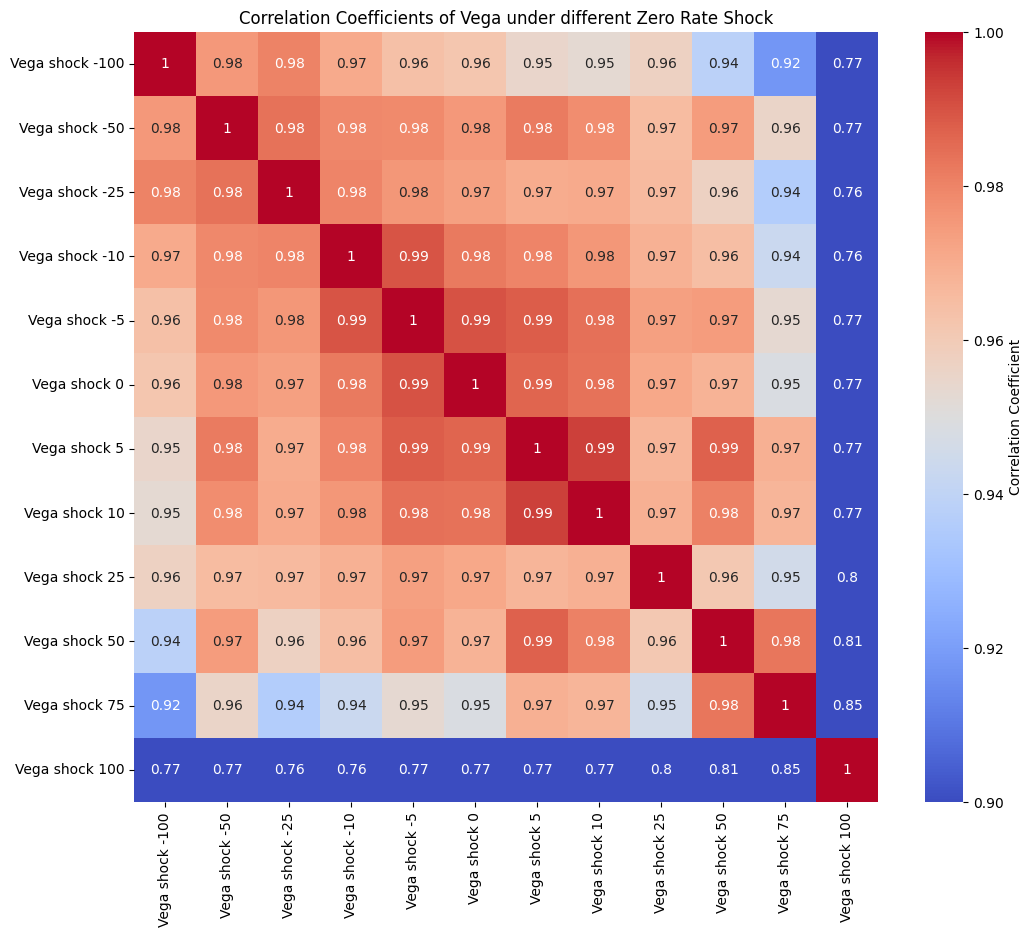

In [ ]:
# Load the DataFrame from the pickle file
loaded_df = pd.read_pickle(os.path.join(df_dir_path, "dummyTrade1_Expiry_10y_Tenor_10y.pkl"))

# Display the loaded DataFrame
loaded_df

# List of Vega shock columns
vega_columns = [
    'Vega shock -100', 'Vega shock -50', 'Vega shock -25', 'Vega shock -10',
    'Vega shock -5', 'Vega shock 0', 'Vega shock 5', 'Vega shock 10',
    'Vega shock 25', 'Vega shock 50', 'Vega shock 75', 'Vega shock 100'
]

# Extract and clean each Vega shock column, dropping NaN values
cleaned_vega_df = loaded_df[vega_columns].dropna()

# Compute the correlation matrix
corr_matrix = cleaned_vega_df.corr()

# Set the range for the color scale to focus on small differences
vmin = 0.9
vmax = 1.0

# Create the heatmap with adjusted vmin and vmax
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=vmin, vmax=vmax, center=0.95, cbar_kws={'label': 'Correlation Coefficient'})

# Set labels and title
plt.title('Correlation Coefficients of Vega under different Zero Shock Columns')
plt.show()

Observation:

- Vega under different Zero Rate Shock values are highly correlated.
- However, vega under Zero Rate Shock 75 and 100 are slightly uncorrelated with vega under other Zero Rate Shock regimes.
- This is because outliers usually happen at Zero Rate Shock = 100 or Zero Rate Shock = 75.

Implication:

- We can select 1 vega value (for instance, under Zero Rate Shock = 0 condition) to represent globally all vega values under different Zero Rate Shock regimes.
- This is because being able to predict the trend movement of 1 vega value will imply being able to predict the trend movement of all vega values.
- We do not consider causal relationship between vega values under different Zero Rate Shock regimes. Mathematically it doesn't make sense.
- Also vega under Zero Rate Shock = 100 or Zero Rate Shock = 75 are "extreme scenarios", so even if we ignore those values, it wouldn't affect our analysis.

## Observe correlation of Vega under different Tenor Buckets

In [ ]:
# Dictionary
Expiry_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
Tenor_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
dummyTrade_dict = {0: 'dummyTrade1', 1: 'dummyTrade2', 2: 'dummyTrade3', 3: 'dummyTrade4', 4: 'dummyTrade5', 5: 'dummyTrade6', 6: 'dummyTrade7', 7: 'dummyTrade8', 8: 'dummyTrade9', 9: 'dummyTrade10', 10: 'dummyTrade11', 11: 'dummyTrade12', }

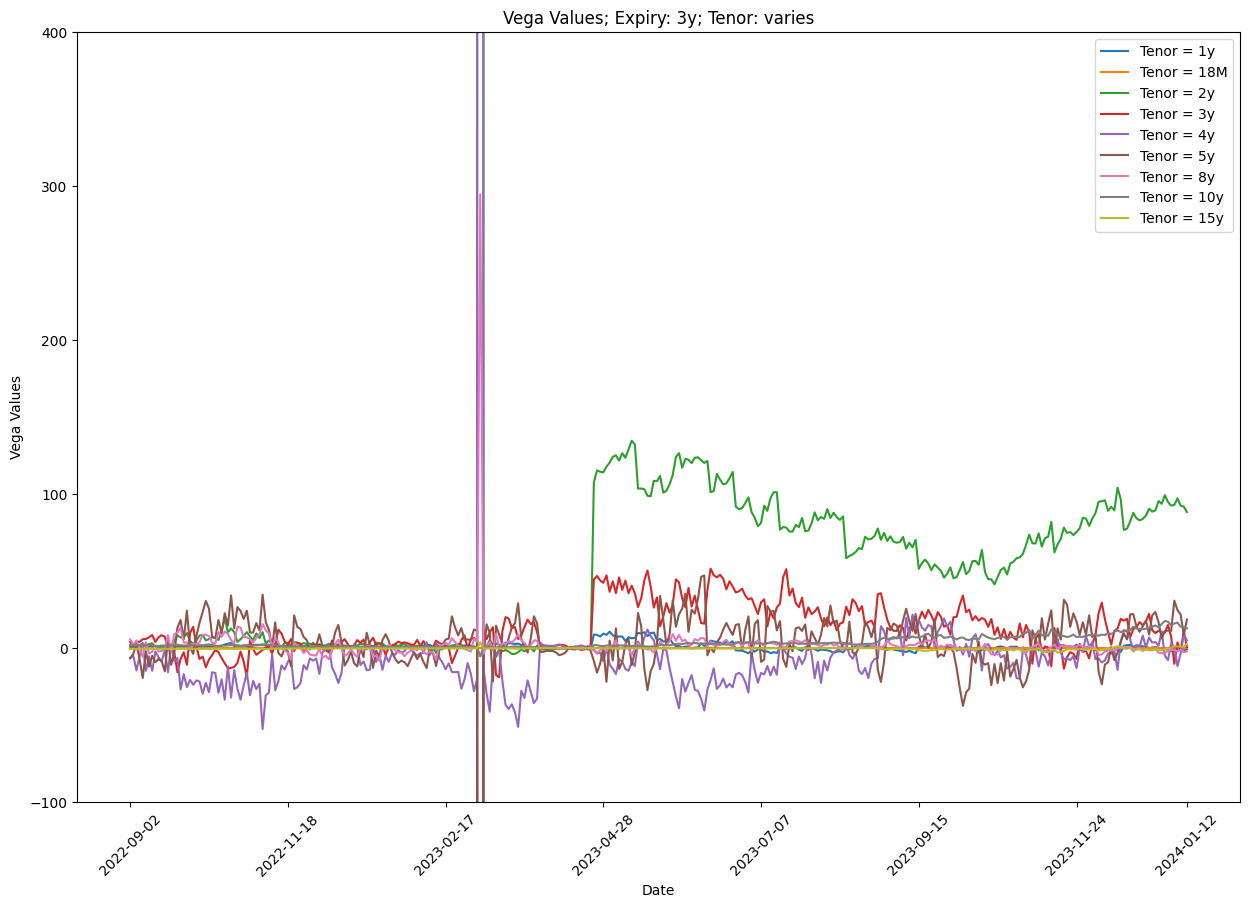

In [ ]:
vega_data = {}

for Tenor_index in range(9):

  # if Tenor_index == 0 or Tenor_index == 2 or Tenor_index == 3 or Tenor_index == 4: # or Tenor_index == 5 or Tenor_index == 6:
  #   continue

  # filename
  file_name = "dummyTrade1_Expiry_3y_Tenor_" + Tenor_dict[Tenor_index] + ".pkl"

  # Load the DataFrame from the pickle file
  loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

  # Extract, clean, and convert columns to NumPy arrays along with the Date
  cleaned_data = loaded_df[['Date', 'Vega shock 0']].dropna()
  vega_data["Tenor = " + Tenor_dict[Tenor_index]] = (cleaned_data['Date'].to_numpy(), cleaned_data['Vega shock 0'].to_numpy())

# Plotting the arrays
plt.figure(figsize=(15, 10))
for tenor, (dates, values) in vega_data.items():
    plt.plot(dates, values, label=tenor)

# # Set y-axis limits
# plt.ylim(-2.5, 7.5)  # Example limits

# Set y-axis limits
plt.ylim(-100, 400)  # Example limits

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Vega Values')
plt.title('Vega Values; Expiry: 3y; Tenor: varies')
plt.legend()

# Customize x-ticks to show date for every 50 entries
all_dates = vega_data["Tenor = 1y"][0]  # Using one column's dates as reference since all dates should be aligned
xticks = np.arange(0, len(all_dates), 50)
if xticks[-1] != len(all_dates) - 1:
    xticks = np.append(xticks, len(all_dates) - 1)
xtick_labels = all_dates[xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Show
plt.show()

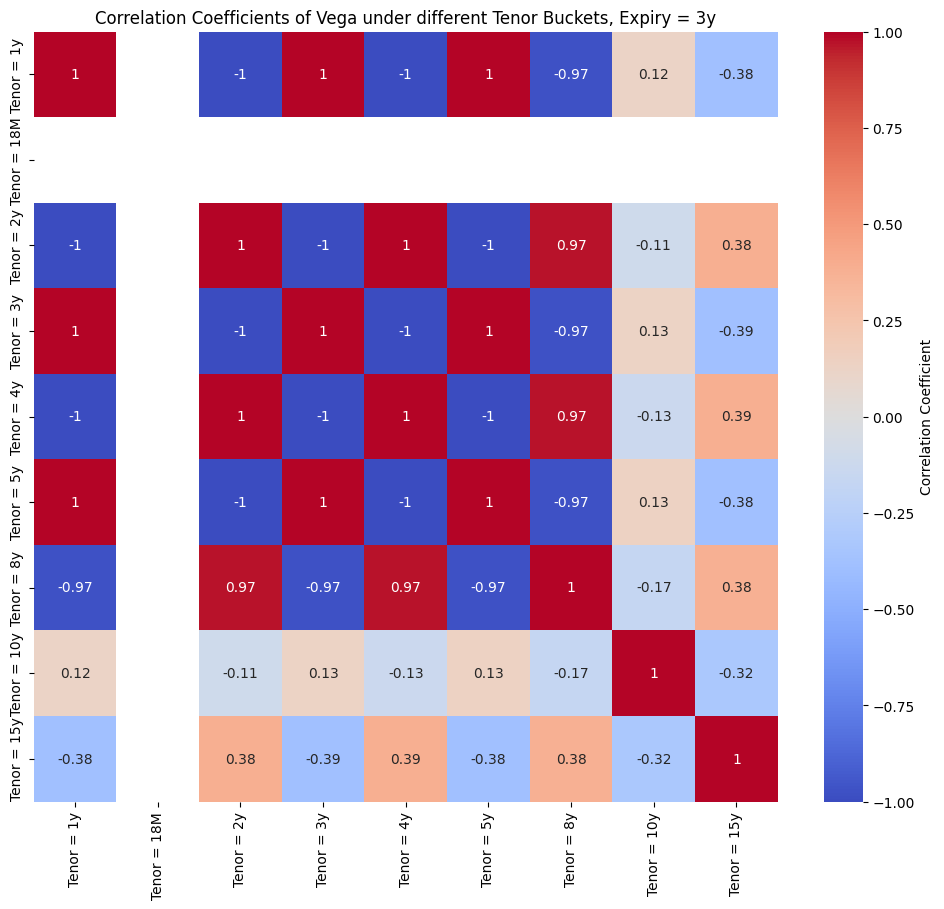

In [ ]:
# Initialize an empty DataFrame for the merged result
merged_df = pd.DataFrame()

for Tenor_index in range(9):

  # filename
  file_name = "dummyTrade1_Expiry_3y_Tenor_" + Tenor_dict[Tenor_index] + ".pkl"

  # Load the DataFrame from the pickle file
  loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

  # Extract, clean, and convert columns to NumPy arrays along with the Date
  cleaned_data = loaded_df[['Date', 'Vega shock 0']].dropna()

  # Rename the 'Vega shock 0' column
  cleaned_data.rename(columns={'Vega shock 0': "Tenor = " + Tenor_dict[Tenor_index]}, inplace=True)

  # Merge the columns into the merged_df
  if merged_df.empty:
      merged_df = cleaned_data
  else:
      merged_df = pd.merge(merged_df, cleaned_data, on='Date', how='outer')

merged_df = merged_df.drop(columns=['Date'])

# Compute the correlation matrix
corr_matrix = merged_df.corr()

# # Set the range for the color scale to focus on small differences
# vmin = 0.9
# vmax = 1.0
# center = 0.95

# Set the range for the color scale to focus on small differences
vmin = -1
vmax = 1
center = 0

# Create the heatmap with adjusted vmin and vmax
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=vmin, vmax=vmax, center=center, cbar_kws={'label': 'Correlation Coefficient'})

# Set labels and title
plt.title('Correlation Coefficients of Vega under different Tenor Buckets, Expiry = 3y')
plt.show()

Observation:

- High correlation between vega with tenor buckets 1y, 2y, 3y, 4y, 5y
- However, 1y is negatively correlated with 2y, positively correlated with 3y, etc.
- For most other cases, no obvious correlation between different tenor buckets
- Note that when tenor is 18M, vega is always 0, so no correlation at all

Implication:

- For vega with tenor buckets 1y, 2y, 3y, 4y, 5y, their trend are highly correlated; understanding the trend of one will lead to understanding the trend of the other

## Observe correlation of Vega under different Expiry Buckets



In [ ]:
# Dictionary
Expiry_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
Tenor_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
dummyTrade_dict = {0: 'dummyTrade1', 1: 'dummyTrade2', 2: 'dummyTrade3', 3: 'dummyTrade4', 4: 'dummyTrade5', 5: 'dummyTrade6', 6: 'dummyTrade7', 7: 'dummyTrade8', 8: 'dummyTrade9', 9: 'dummyTrade10', 10: 'dummyTrade11', 11: 'dummyTrade12', }

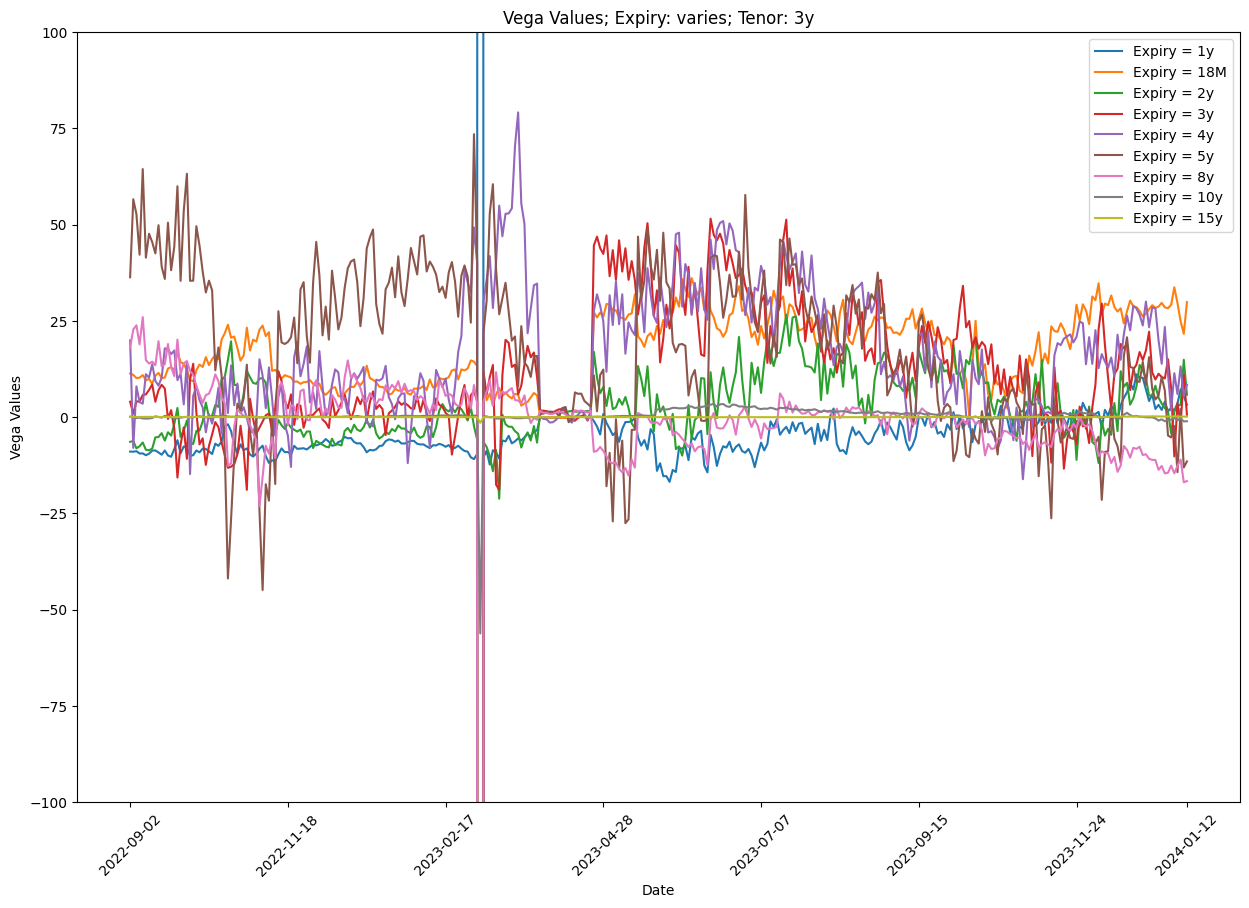

In [ ]:
vega_data = {}

for Expiry_index in range(9):

  # filename
  file_name = "dummyTrade1_Expiry_" + Expiry_dict[Expiry_index] + "_Tenor_3y.pkl"

  # Load the DataFrame from the pickle file
  loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

  # Extract, clean, and convert columns to NumPy arrays along with the Date
  cleaned_data = loaded_df[['Date', 'Vega shock 0']].dropna()
  vega_data["Expiry = " + Expiry_dict[Expiry_index]] = (cleaned_data['Date'].to_numpy(), cleaned_data['Vega shock 0'].to_numpy())

# Plotting the arrays
plt.figure(figsize=(15, 10))
for tenor, (dates, values) in vega_data.items():
    plt.plot(dates, values, label=tenor)

# # Set y-axis limits
# plt.ylim(-2.5, 7.5)  # Example limits

# Set y-axis limits
plt.ylim(-100, 100)  # Example limits

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Vega Values')
plt.title('Vega Values; Expiry: varies; Tenor: 3y')
plt.legend()

# Customize x-ticks to show date for every 50 entries
all_dates = vega_data["Expiry = 1y"][0]  # Using one column's dates as reference since all dates should be aligned
xticks = np.arange(0, len(all_dates), 50)
if xticks[-1] != len(all_dates) - 1:
    xticks = np.append(xticks, len(all_dates) - 1)
xtick_labels = all_dates[xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Show
plt.show()

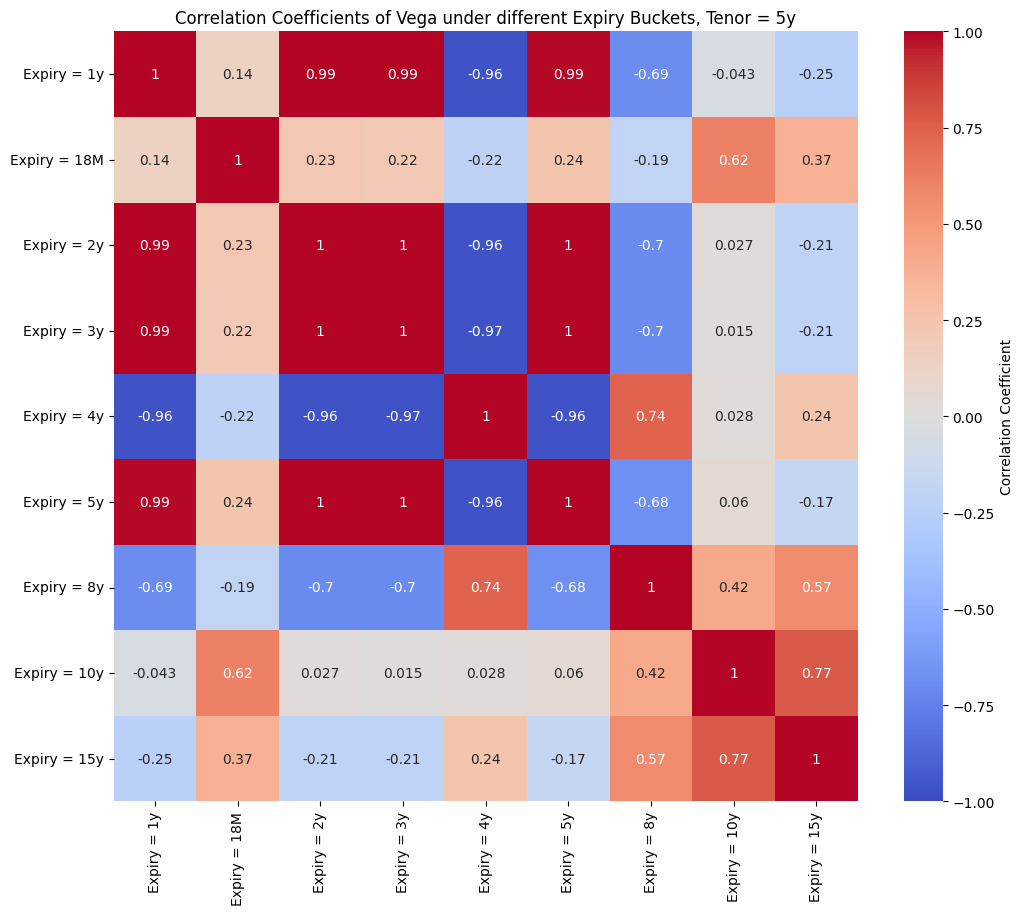

In [ ]:
# Initialize an empty DataFrame for the merged result
merged_df = pd.DataFrame()

for Expiry_index in range(9):

  # filename
  file_name = "dummyTrade1_Expiry_" + Expiry_dict[Expiry_index] + "_Tenor_5y.pkl"

  # Load the DataFrame from the pickle file
  loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

  # Extract, clean, and convert columns to NumPy arrays along with the Date
  cleaned_data = loaded_df[['Date', 'Vega shock 0']].dropna()

  # Rename the 'Vega shock 0' column
  cleaned_data.rename(columns={'Vega shock 0': "Expiry = " + Expiry_dict[Expiry_index]}, inplace=True)

  # Merge the columns into the merged_df
  if merged_df.empty:
      merged_df = cleaned_data
  else:
      merged_df = pd.merge(merged_df, cleaned_data, on='Date', how='outer')

merged_df = merged_df.drop(columns=['Date'])

# Compute the correlation matrix
corr_matrix = merged_df.corr()

# # Set the range for the color scale to focus on small differences
# vmin = 0.9
# vmax = 1.0
# center = 0.95

# Set the range for the color scale to focus on small differences
vmin = -1
vmax = 1
center = 0

# Create the heatmap with adjusted vmin and vmax
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=vmin, vmax=vmax, center=center, cbar_kws={'label': 'Correlation Coefficient'})

# Set labels and title
plt.title('Correlation Coefficients of Vega under different Expiry Buckets, Tenor = 5y')
plt.show()

Observation:

- High correlation between vega with expiry buckets 1y, 2y, 3y, 4y, 5y
- However, 4y is negatively correlated with other years
- For most other cases, no obvious correlation between different expiry buckets
- Note that when expiry is 18M, vega is closed to 0, so no correlation at all

Implication:

- For vega with expiry buckets 1y, 2y, 3y, 4y, 5y, their trend are highly correlated; understanding the trend of one will lead to understanding the trend of the other

## Observe correlation of Vega under different Expiry and Tenor Buckets

In [ ]:
# Dictionary
Expiry_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
Tenor_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
dummyTrade_dict = {0: 'dummyTrade1', 1: 'dummyTrade2', 2: 'dummyTrade3', 3: 'dummyTrade4', 4: 'dummyTrade5', 5: 'dummyTrade6', 6: 'dummyTrade7', 7: 'dummyTrade8', 8: 'dummyTrade9', 9: 'dummyTrade10', 10: 'dummyTrade11', 11: 'dummyTrade12', }

In [ ]:
# Initialize an empty DataFrame for the merged result
merged_df = pd.DataFrame()

for Expiry_index in range(9):

  for Tenor_index in range(9):

    # filename
    file_name = "dummyTrade1_Expiry_" + Expiry_dict[Expiry_index] + "_Tenor_" + Tenor_dict[Tenor_index] + ".pkl"

    # Load the DataFrame from the pickle file
    loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

    # Extract, clean, and convert columns to NumPy arrays along with the Date
    cleaned_data = loaded_df[['Date', 'Vega shock 0']].dropna()

    # Rename the 'Vega shock 0' column
    cleaned_data.rename(columns={'Vega shock 0': "Expiry = " + Expiry_dict[Expiry_index] + "; Tenor = " + Tenor_dict[Tenor_index]}, inplace=True)

    # Merge the columns into the merged_df
    if merged_df.empty:
        merged_df = cleaned_data
    else:
        merged_df = pd.merge(merged_df, cleaned_data, on='Date', how='outer')

merged_df = merged_df.drop(columns=['Date'])

# Compute the correlation matrix
corr_matrix = merged_df.corr()

# # Set the range for the color scale to focus on small differences
# vmin = 0.9
# vmax = 1.0
# center = 0.95

# Set the range for the color scale to focus on small differences
vmin = -1
vmax = 1
center = 0

# Create the heatmap with adjusted vmin and vmax
plt.figure(figsize=(120, 100))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=vmin, vmax=vmax, center=center, cbar_kws={'label': 'Correlation Coefficient'})

# Set labels and title
plt.title('Correlation Coefficients of Vega under different Expiry and Tenor Buckets')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Observationn:

- Expiry 1y, Tenor 1y, 2y, 3y, 4y, 5y are highly correlated with each other
- Expiry 18M, Tenor 1y, 2y, 3y, 4y are highly correlated with each other
- Expiry 2y, Tenor 1y, 2y, 3y, 4y, 5y are highly correlated with each other
- Expiry 3y, Tenor 1y, 2y, 3y, 4y, 5y, 8y are highly correlated with each other
- Expiry 4y, Tenor 1y, 2y, 3y, 4y, 5y, 8y are highly correlated with each other (not as highly correlated as 3y)
- Expiry 5y, Tenor 1y, 2y, 3y, 4y, 5y are highly correlated with each other
- Expiry 8y, Tenor 1y, 2y, 3y, 4y are highly correlated with each other

Maybe choose Expiry 3y Tenor 1y, 2y, 3y, 4y, 5y, 8y

## Observe correlation of Market Swap Rates under different Expiry and Tenor Buckets

In [ ]:
# Dictionary
Expiry_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
Tenor_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
dummyTrade_dict = {0: 'dummyTrade1', 1: 'dummyTrade2', 2: 'dummyTrade3', 3: 'dummyTrade4', 4: 'dummyTrade5', 5: 'dummyTrade6', 6: 'dummyTrade7', 7: 'dummyTrade8', 8: 'dummyTrade9', 9: 'dummyTrade10', 10: 'dummyTrade11', 11: 'dummyTrade12', }

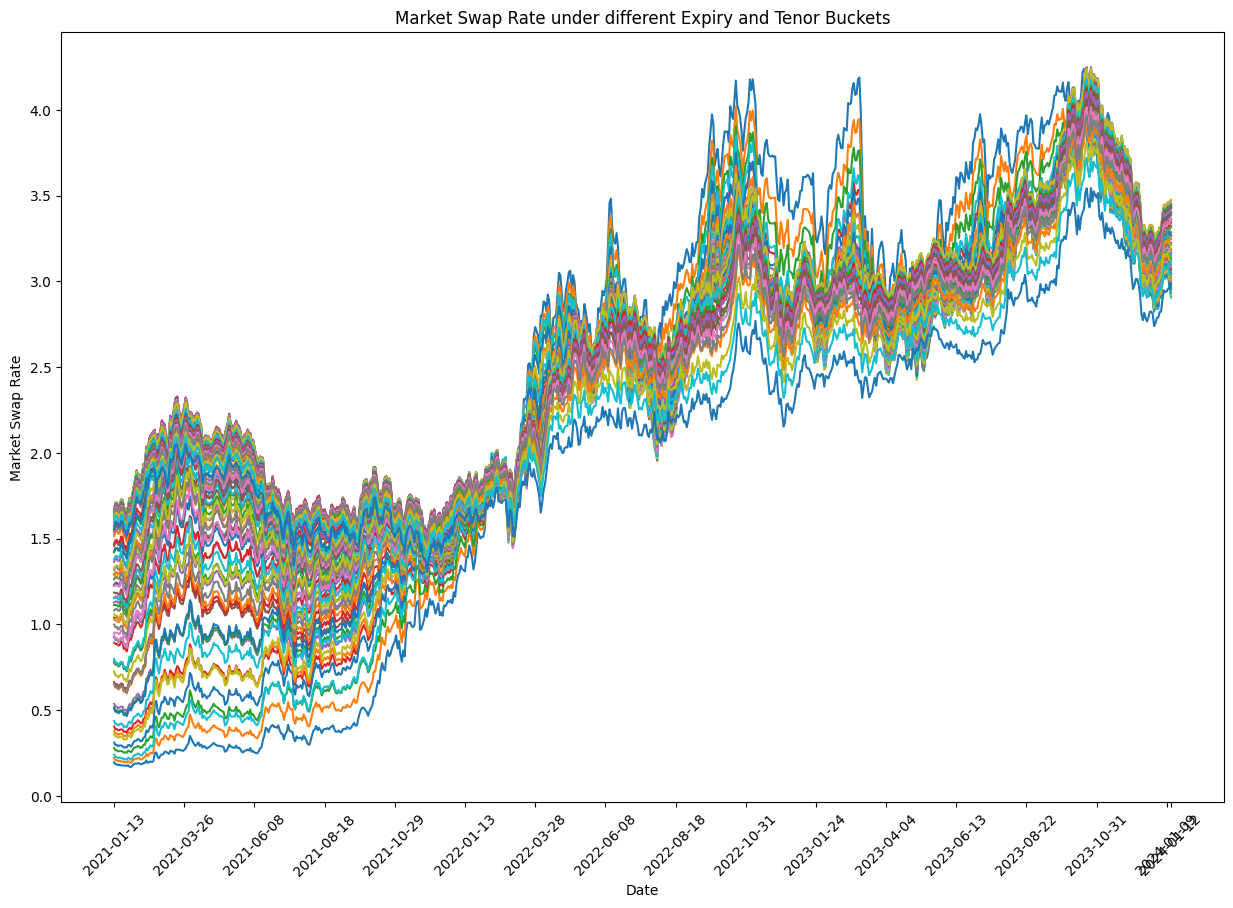

In [ ]:
vega_data = {}

for Expiry_index in range(9):

  for Tenor_index in range(9):

    # filename
    file_name = "dummyTrade1_Expiry_" + Expiry_dict[Expiry_index] + "_Tenor_" + Tenor_dict[Tenor_index] + ".pkl"

    # Load the DataFrame from the pickle file
    loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

    # Extract, clean, and convert columns to NumPy arrays along with the Date
    cleaned_data = loaded_df[['Date', 'Swap Rate']].dropna()
    vega_data["Expiry = " + Expiry_dict[Expiry_index] + "; Tenor = " + Tenor_dict[Tenor_index]] = (cleaned_data['Date'].to_numpy(), cleaned_data['Swap Rate'].to_numpy())

# Plotting the arrays
plt.figure(figsize=(15, 10))
for name, (dates, values) in vega_data.items():
    plt.plot(dates, values, label=name)

# # Set y-axis limits
# plt.ylim(-200, 500)  # Example limits

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Market Swap Rate')
plt.title('Market Swap Rate under different Expiry and Tenor Buckets')
# plt.legend()

# Customize x-ticks to show date for every 50 entries
all_dates = vega_data["Expiry = 1y; Tenor = 1y"][0]  # Using one column's dates as reference since all dates should be aligned
xticks = np.arange(0, len(all_dates), 50)
if xticks[-1] != len(all_dates) - 1:
    xticks = np.append(xticks, len(all_dates) - 1)
xtick_labels = all_dates[xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Show
plt.show()

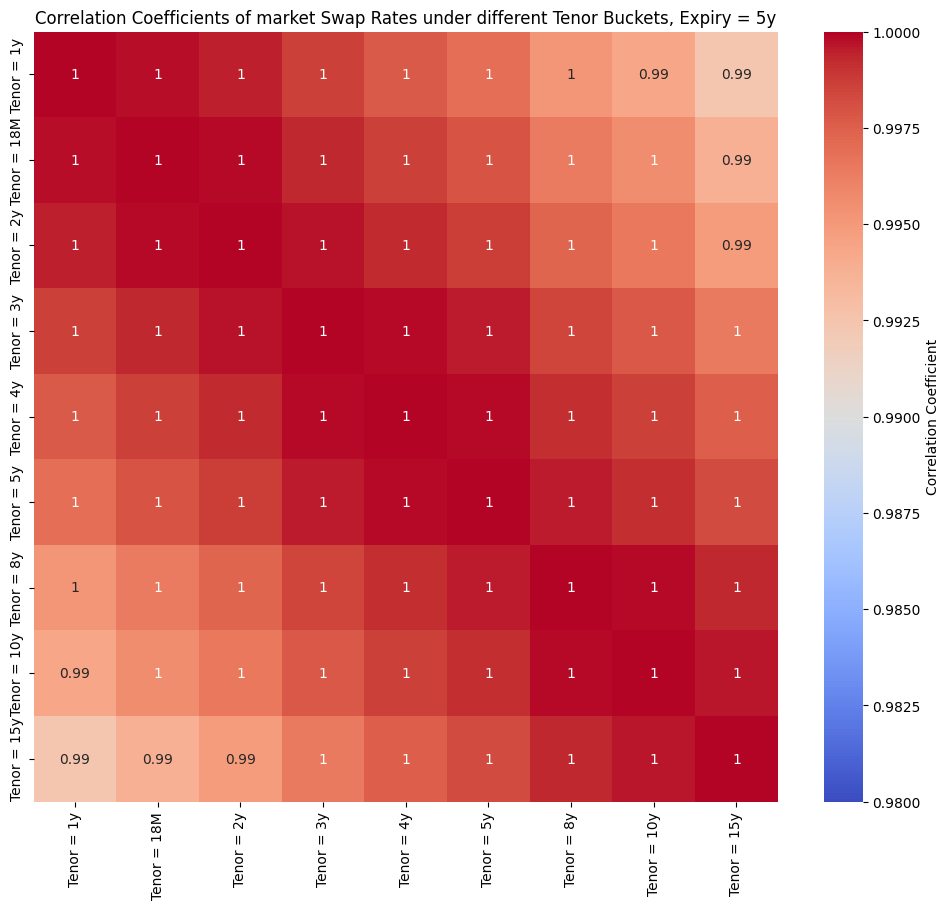

In [ ]:
# Initialize an empty DataFrame for the merged result
merged_df = pd.DataFrame()

for Tenor_index in range(9):

  # filename
  file_name = "dummyTrade1_Expiry_5y_Tenor_" + Tenor_dict[Tenor_index] + ".pkl"

  # Load the DataFrame from the pickle file
  loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

  # Extract, clean, and convert columns to NumPy arrays along with the Date
  cleaned_data = loaded_df[['Date', 'Swap Rate']].dropna()

  # Rename the 'Vega shock 0' column
  cleaned_data.rename(columns={'Swap Rate': "Tenor = " + Tenor_dict[Tenor_index]}, inplace=True)

  # Merge the columns into the merged_df
  if merged_df.empty:
      merged_df = cleaned_data
  else:
      merged_df = pd.merge(merged_df, cleaned_data, on='Date', how='outer')

merged_df = merged_df.drop(columns=['Date'])

# Compute the correlation matrix
corr_matrix = merged_df.corr()

# Set the range for the color scale to focus on small differences
vmin = 0.98
vmax = 1.0
center = 0.99

# Create the heatmap with adjusted vmin and vmax
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=vmin, vmax=vmax, center=center, cbar_kws={'label': 'Correlation Coefficient'})

# Set labels and title
plt.title('Correlation Coefficients of market Swap Rates under different Tenor Buckets, Expiry = 5y')
plt.show()

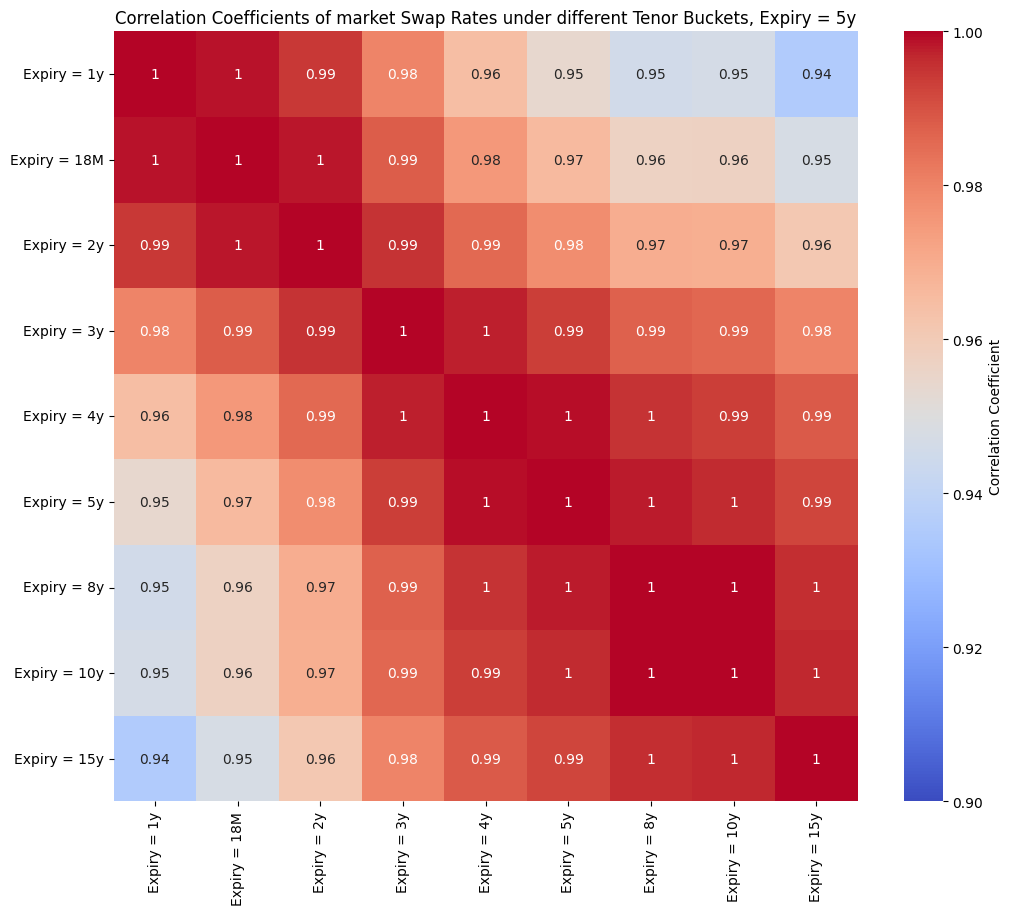

In [ ]:
# Initialize an empty DataFrame for the merged result
merged_df = pd.DataFrame()

for Expiry_index in range(9):

  # filename
  file_name = "dummyTrade1_Expiry_" + Expiry_dict[Expiry_index] + "_Tenor_5y.pkl"

  # Load the DataFrame from the pickle file
  loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

  # Extract, clean, and convert columns to NumPy arrays along with the Date
  cleaned_data = loaded_df[['Date', 'Swap Rate']].dropna()

  # Rename the 'Vega shock 0' column
  cleaned_data.rename(columns={'Swap Rate': "Expiry = " + Expiry_dict[Expiry_index]}, inplace=True)

  # Merge the columns into the merged_df
  if merged_df.empty:
      merged_df = cleaned_data
  else:
      merged_df = pd.merge(merged_df, cleaned_data, on='Date', how='outer')

merged_df = merged_df.drop(columns=['Date'])

# Compute the correlation matrix
corr_matrix = merged_df.corr()

# Set the range for the color scale to focus on small differences
vmin = 0.90
vmax = 1.0
center = 0.95

# Create the heatmap with adjusted vmin and vmax
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=vmin, vmax=vmax, center=center, cbar_kws={'label': 'Correlation Coefficient'})

# Set labels and title
plt.title('Correlation Coefficients of market Swap Rates under different Tenor Buckets, Expiry = 5y')
plt.show()

Observation:

- Market Swap Rates under different Expiry and Tenor Buckets are highly correlated.

Implication:

- We can select 1 market Swap Rate value to represent globally all market swap rate values under different Expiry and Tenor Buckets.
- This is because being able to predict the trend movement of 1 market swap rate will imply being able to predict the trend movement of all market swap rates.
- We do not consider causal relationship between market swap rates under different buckets, since they are all influenced by the same set of external factors.

## Observe correlation of Implied Normal Volatility under different Strike Rates

In [ ]:
# Dictionary
Expiry_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
Tenor_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
dummyTrade_dict = {0: 'dummyTrade1', 1: 'dummyTrade2', 2: 'dummyTrade3', 3: 'dummyTrade4', 4: 'dummyTrade5', 5: 'dummyTrade6', 6: 'dummyTrade7', 7: 'dummyTrade8', 8: 'dummyTrade9', 9: 'dummyTrade10', 10: 'dummyTrade11', 11: 'dummyTrade12'}
Strike_dict = {0: 'atm-1.0%', 1: 'atm-0.5%', 2: 'atm', 3: 'atm+0.5%', 4: 'atm+1.0%'}

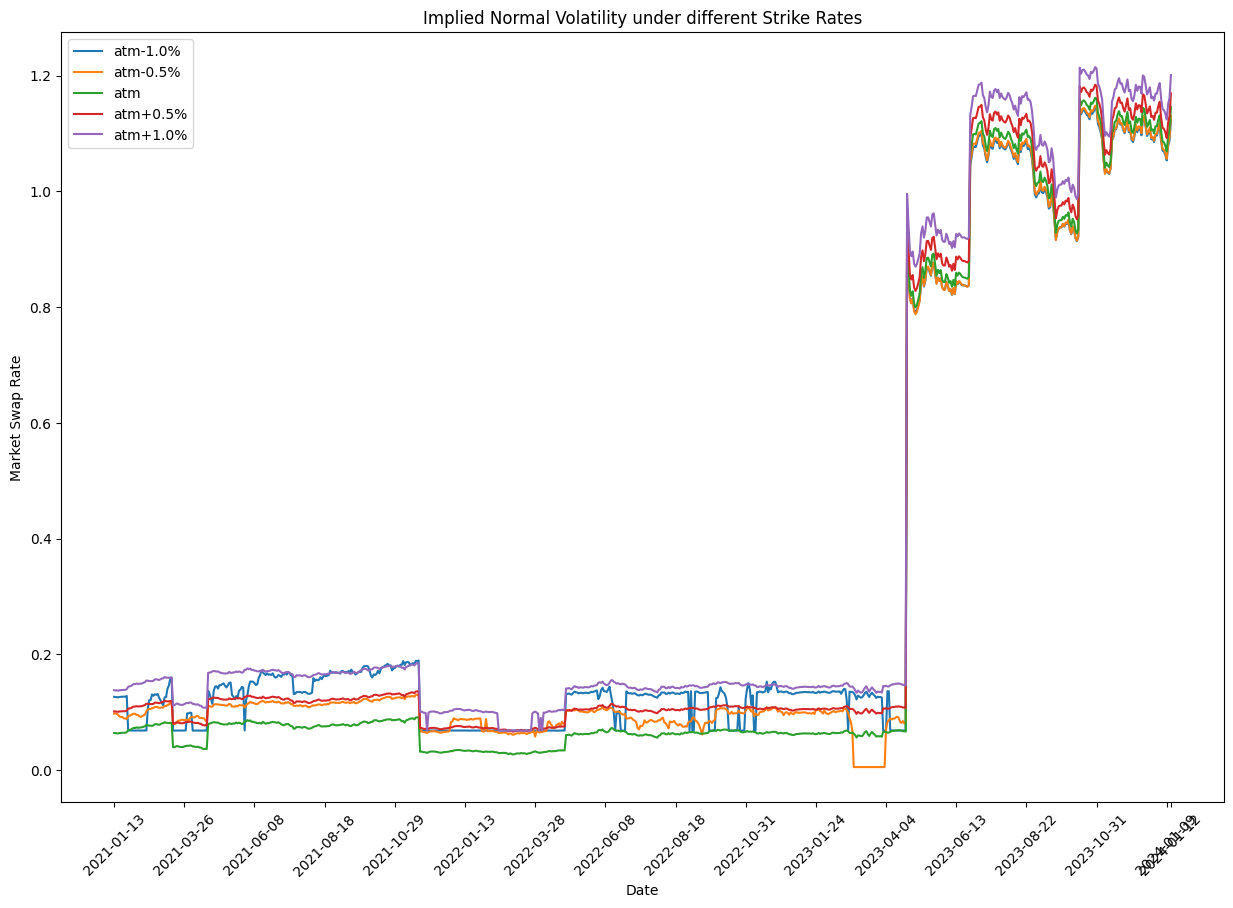

In [ ]:
vega_data = {}

for Strike_index in range(5):

    # filename
    file_name = "dummyTrade1_Expiry_3y_Tenor_3y.pkl"

    # Load the DataFrame from the pickle file
    loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

    # Extract, clean, and convert columns to NumPy arrays along with the Date
    cleaned_data = loaded_df[['Date', Strike_dict[Strike_index]]].dropna()
    vega_data[Strike_dict[Strike_index]] = (cleaned_data['Date'].to_numpy(), cleaned_data[Strike_dict[Strike_index]].to_numpy())

# Plotting the arrays
plt.figure(figsize=(15, 10))
for name, (dates, values) in vega_data.items():
    plt.plot(dates, values, label=name)

# # Set y-axis limits
# plt.ylim(-200, 500)  # Example limits

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Market Swap Rate')
plt.title('Implied Normal Volatility under different Strike Rates')
plt.legend()

# Customize x-ticks to show date for every 50 entries
all_dates = vega_data[Strike_dict[0]][0]  # Using one column's dates as reference since all dates should be aligned
xticks = np.arange(0, len(all_dates), 50)
if xticks[-1] != len(all_dates) - 1:
    xticks = np.append(xticks, len(all_dates) - 1)
xtick_labels = all_dates[xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Show
plt.show()

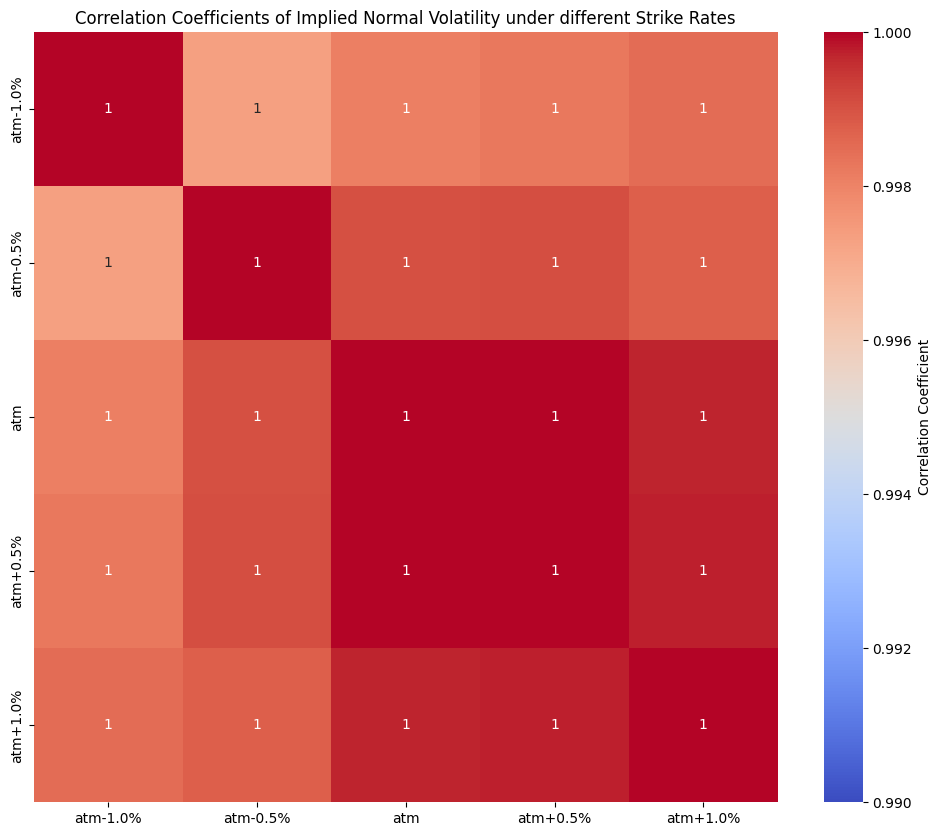

In [ ]:
# Initialize an empty DataFrame for the merged result
merged_df = pd.DataFrame()

for Strike_index in range(5):

  # filename
  file_name = "dummyTrade1_Expiry_3y_Tenor_3y.pkl"

  # Load the DataFrame from the pickle file
  loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

  # Extract, clean, and convert columns to NumPy arrays along with the Date
  cleaned_data = loaded_df[['Date', Strike_dict[Strike_index]]].dropna()

  # Merge the columns into the merged_df
  if merged_df.empty:
      merged_df = cleaned_data
  else:
      merged_df = pd.merge(merged_df, cleaned_data, on='Date', how='outer')

merged_df = merged_df.drop(columns=['Date'])

# Compute the correlation matrix
corr_matrix = merged_df.corr()

# Set the range for the color scale to focus on small differences
vmin = 0.99
vmax = 1.00
center = 0.995

# Create the heatmap with adjusted vmin and vmax
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=vmin, vmax=vmax, center=center, cbar_kws={'label': 'Correlation Coefficient'})

# Set labels and title
plt.title('Correlation Coefficients of Implied Normal Volatility under different Strike Rates')
plt.show()

## Observe correlation of Vega of different dummyTrades

In [ ]:
# Dictionary
Expiry_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
Tenor_dict = {0: '1y', 1: '18M', 2: '2y', 3: '3y', 4: '4y', 5: '5y', 6: '8y', 7: '10y', 8: '15y'}
dummyTrade_dict = {0: 'dummyTrade1', 1: 'dummyTrade2', 2: 'dummyTrade3', 3: 'dummyTrade4', 4: 'dummyTrade5', 5: 'dummyTrade6', 6: 'dummyTrade7', 7: 'dummyTrade8', 8: 'dummyTrade9', 9: 'dummyTrade10', 10: 'dummyTrade11', 11: 'dummyTrade12'}
Strike_dict = {0: 'atm-1.0%', 1: 'atm-0.5%', 2: 'atm', 3: 'atm+0.5%', 4: 'atm+1.0%'}

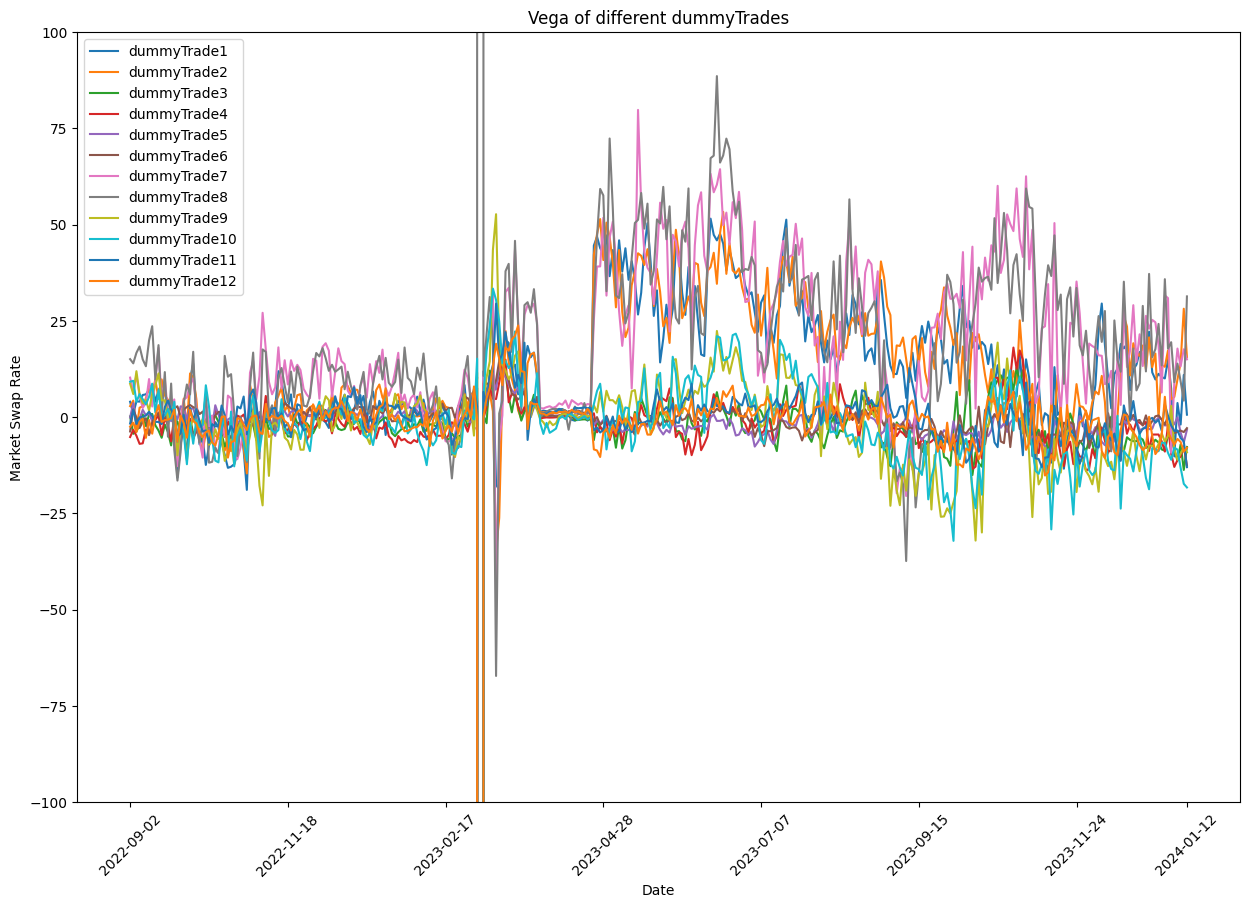

In [ ]:
vega_data = {}

for dummyTrade_index in range(12):

    # filename
    file_name = dummyTrade_dict[dummyTrade_index] + "_Expiry_3y_Tenor_3y.pkl"

    # Load the DataFrame from the pickle file
    loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

    # Extract, clean, and convert columns to NumPy arrays along with the Date
    cleaned_data = loaded_df[['Date', 'Vega shock 0']].dropna()
    vega_data[dummyTrade_dict[dummyTrade_index]] = (cleaned_data['Date'].to_numpy(), cleaned_data['Vega shock 0'].to_numpy())

# Plotting the arrays
plt.figure(figsize=(15, 10))
for name, (dates, values) in vega_data.items():
    plt.plot(dates, values, label=name)

# Set y-axis limits
plt.ylim(-100, 100)  # Example limits

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Market Swap Rate')
plt.title('Vega of different dummyTrades')
plt.legend()

# Customize x-ticks to show date for every 50 entries
all_dates = vega_data['dummyTrade1'][0]  # Using one column's dates as reference since all dates should be aligned
xticks = np.arange(0, len(all_dates), 50)
if xticks[-1] != len(all_dates) - 1:
    xticks = np.append(xticks, len(all_dates) - 1)
xtick_labels = all_dates[xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

# Show
plt.show()

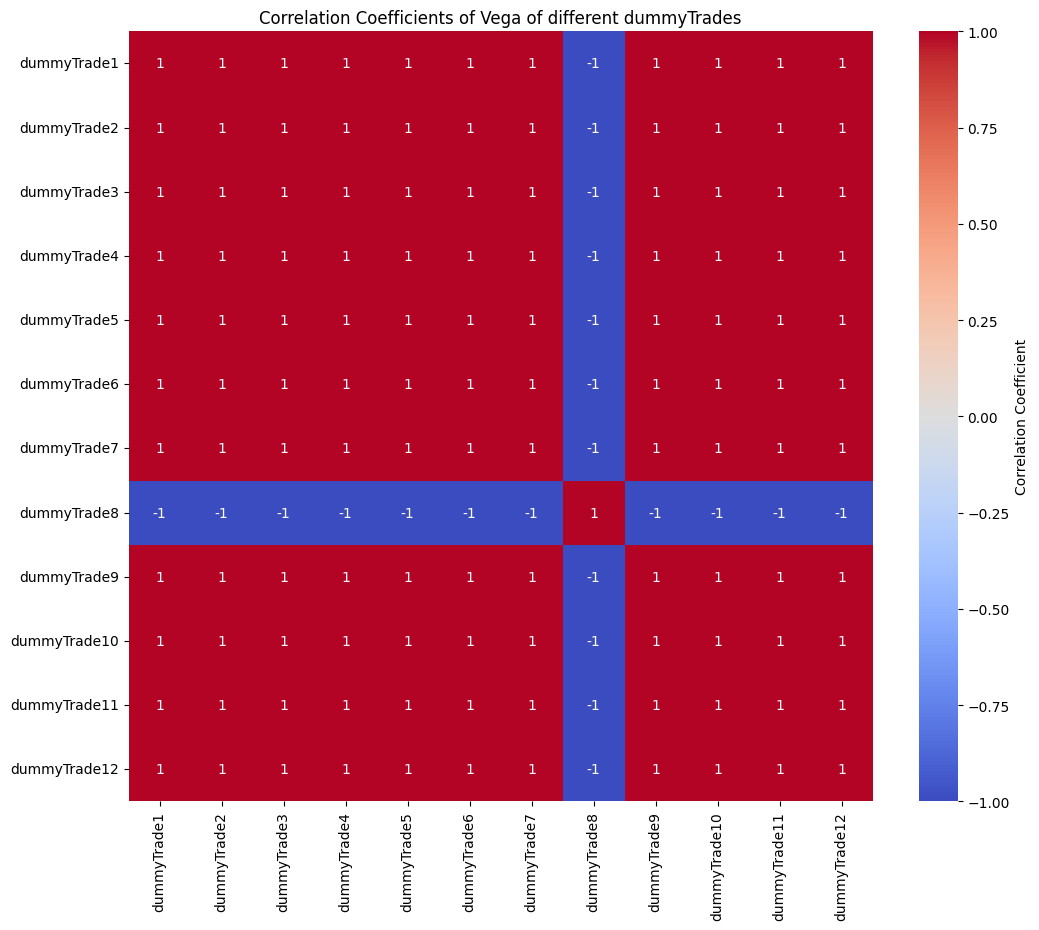

In [ ]:
# Initialize an empty DataFrame for the merged result
merged_df = pd.DataFrame()

for dummyTrade_index in range(12):

  # filename
  file_name = dummyTrade_dict[dummyTrade_index] + "_Expiry_3y_Tenor_3y.pkl"

  # Load the DataFrame from the pickle file
  loaded_df = pd.read_pickle(os.path.join(df_dir_path, file_name))

  # Extract, clean, and convert columns to NumPy arrays along with the Date
  cleaned_data = loaded_df[['Date', 'Vega shock 0']].dropna()

  # Rename the 'Vega shock 0' column
  cleaned_data.rename(columns={'Vega shock 0': dummyTrade_dict[dummyTrade_index]}, inplace=True)

  # Merge the columns into the merged_df
  if merged_df.empty:
      merged_df = cleaned_data
  else:
      merged_df = pd.merge(merged_df, cleaned_data, on='Date', how='outer')

merged_df = merged_df.drop(columns=['Date'])

# Compute the correlation matrix
corr_matrix = merged_df.corr()

# # Set the range for the color scale to focus on small differences
# vmin = 0.99
# vmax = 1.00
# center = 0.995

# Set the range for the color scale to focus on small differences
vmin = -1
vmax = 1
center = 0

# Create the heatmap with adjusted vmin and vmax
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=vmin, vmax=vmax, center=center, cbar_kws={'label': 'Correlation Coefficient'})

# Set labels and title
plt.title('Correlation Coefficients of Vega of different dummyTrades')
plt.show()